In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load the dataset
df = pd.read_csv('fake_job_postings.csv')

In [5]:
# Display the first few rows of the dataset
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
# Inspect the column names
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
# Check for missing values in each column
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
# Fill missing values in 'department' with the mode
df['department'] = df['department'].fillna(df['department'].mode()[0])

In [9]:
# Drop rows with any missing values
df.dropna(axis=0, how='any', inplace=True)

In [10]:
# Separate features and target variable
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

In [11]:
# Identify categorical and numerical features
cat_features = ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits',
                'employment_type', 'required_experience', 'required_education', 'industry', 'function']
num_features = ['telecommuting', 'has_company_logo', 'has_questions']

In [12]:
# Define imputers for categorical and numerical features
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
num_imputer = SimpleImputer(strategy='median')

In [13]:
# Create a preprocessor to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Fit the preprocessor on the training data and transform both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [16]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [18]:
# Calculate accuracy, confusion matrix, and classification report to evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [19]:
# Print the model accuracy, confusion matrix, and classification report
print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Logistic Regression Model Accuracy: 97.52%
Confusion Matrix:
 [[298   0]
 [  8  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       298
           1       1.00      0.67      0.80        24

    accuracy                           0.98       322
   macro avg       0.99      0.83      0.89       322
weighted avg       0.98      0.98      0.97       322



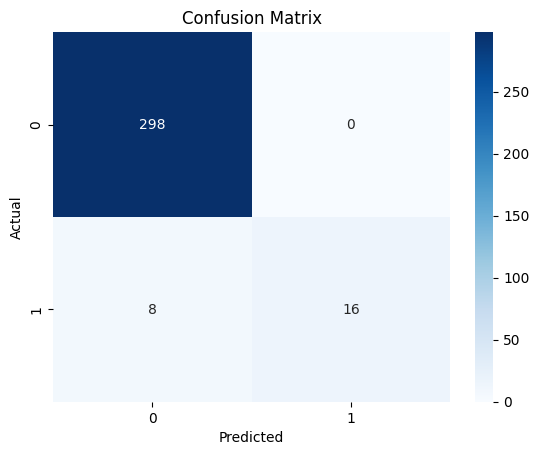

In [20]:
# Plot the confusion matrix to visualize the model's performance
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()